Decision Tree Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
DTdata = pd.read_csv('spamDataset.csv')
DTdata.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,...,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000
mean,0.104329,0.112799,0.291678,0.063189,0.325800,0.096644,0.117694,0.108051,0.091875,0.248475,...,0.039951,0.141838,0.017363,0.281121,0.075604,0.045371,5.322680,49.378391,275.394336,0.398144
std,0.300191,0.454667,0.516139,1.353771,0.688366,0.276262,0.397630,0.410627,0.282348,0.657083,...,0.251767,0.231006,0.105815,0.843850,0.238373,0.435294,32.980361,126.713928,479.736935,0.489574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625250,7.000000,39.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.294000,15.000000,101.000000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.703500,44.000000,271.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,3752.000000,1.000000


In [ ]:
# Split features and target variable

In [3]:
X = DTdata.iloc[:,0:57]

In [4]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
y = DTdata.iloc[:, -1]

In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [7]:
#Apply StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X[0:5]

array([[-3.47583077e-01,  1.15967179e+00,  6.74942169e-01,
        -4.66817919e-02, -8.42620199e-03, -3.49870479e-01,
        -2.96023880e-01, -2.63168004e-01, -3.25435783e-01,
        -3.78192844e-01, -3.07377727e-01,  8.38420890e-02,
        -3.15477414e-01, -1.76533973e-01, -1.84998051e-01,
         8.25304648e-02, -3.25871334e-01,  2.03307367e+00,
         1.18593781e-01, -1.68212826e-01,  1.29616193e-01,
        -1.21972061e-01, -2.85908569e-01, -2.10423943e-01,
        -3.42773936e-01, -3.08821921e-01, -2.08552542e-01,
        -2.40404288e-01, -1.70754281e-01, -2.36358394e-01,
        -1.64262705e-01, -1.49513446e-01, -1.79968386e-01,
        -1.51727686e-01, -2.03674412e-01, -2.57300927e-01,
        -3.38394947e-01, -6.16248362e-02, -1.87794353e-01,
        -1.91970202e-01, -1.30041904e-01, -1.78504327e-01,
        -2.10574708e-01, -1.32103408e-01, -3.06374403e-01,
        -2.04031550e-01, -7.30743472e-02, -1.16463593e-01,
        -1.58701502e-01, -6.14076182e-01, -1.64106436e-0

In [8]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3361, 57)
X_test shape: (841, 57)
y_train shape: (3361,)
y_test shape: (841,)


In [9]:
# Decision tree model and train it
dtModel = DecisionTreeClassifier(random_state=42)
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
#Predict Values
pred = dtModel.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [11]:
#Original Values
y_test

2442    0
2318    0
351     1
2288    0
2044    0
       ..
4139    0
1539    1
152     1
1550    1
1867    0
Name: spam, Length: 841, dtype: int64

In [12]:
#Accuracy for testing data

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9001189060642093

<AxesSubplot:>

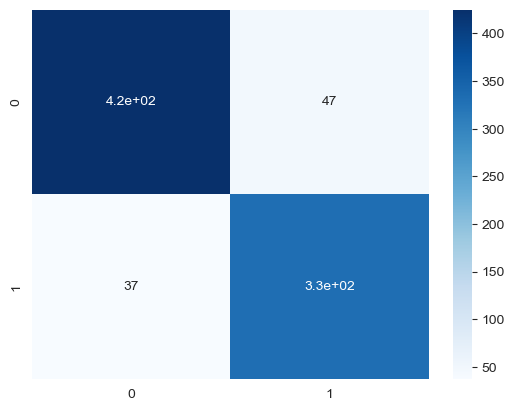

In [13]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

In [14]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       472
           1       0.88      0.90      0.89       369

    accuracy                           0.90       841
   macro avg       0.90      0.90      0.90       841
weighted avg       0.90      0.90      0.90       841



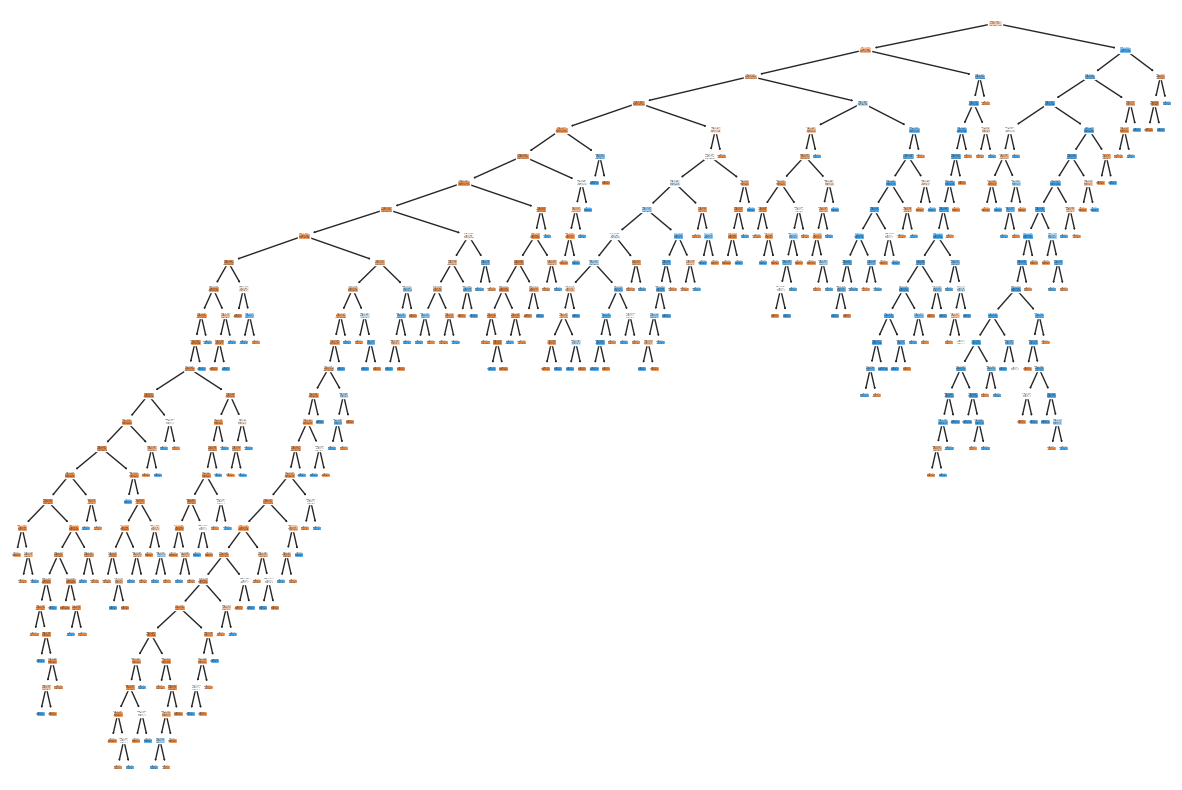

In [15]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtModel,filled=True)
plt.show()